In [1]:
from urllib.request import urlopen, Request
import json

# 1. Download (urllib)
request = Request(
    "https://disease.sh/v3/covid-19/countries?sort=cases",
    headers={"User-Agent": "Mozilla/5.0"},
)
response = urlopen(request)
raw_data = response.read()

In [2]:
raw_data

b'[{"updated":1623082838164,"country":"USA","countryInfo":{"_id":840,"iso2":"US","iso3":"USA","lat":38,"long":-97,"flag":"https://disease.sh/assets/img/flags/us.png"},"cases":34211228,"todayCases":446,"deaths":612378,"todayDeaths":12,"recovered":28122741,"todayRecovered":4,"active":5476109,"critical":5280,"casesPerOneMillion":102796,"deathsPerOneMillion":1840,"tests":486894727,"testsPerOneMillion":1462993,"population":332807303,"continent":"North America","oneCasePerPeople":10,"oneDeathPerPeople":543,"oneTestPerPeople":1,"undefined":16454,"activePerOneMillion":16454.29,"recoveredPerOneMillion":84501.57,"criticalPerOneMillion":15.87},{"updated":1623082838165,"country":"India","countryInfo":{"_id":356,"iso2":"IN","iso3":"IND","lat":20,"long":77,"flag":"https://disease.sh/assets/img/flags/in.png"},"cases":28974152,"todayCases":64548,"deaths":350631,"todayDeaths":1402,"recovered":27282022,"todayRecovered":131295,"active":1341499,"critical":8944,"casesPerOneMillion":20806,"deathsPerOneMilli

In [3]:
type(raw_data)

bytes

In [4]:
import json

In [5]:
data = json.loads(raw_data)
data

[{'updated': 1623082838164,
  'country': 'USA',
  'countryInfo': {'_id': 840,
   'iso2': 'US',
   'iso3': 'USA',
   'lat': 38,
   'long': -97,
   'flag': 'https://disease.sh/assets/img/flags/us.png'},
  'cases': 34211228,
  'todayCases': 446,
  'deaths': 612378,
  'todayDeaths': 12,
  'recovered': 28122741,
  'todayRecovered': 4,
  'active': 5476109,
  'critical': 5280,
  'casesPerOneMillion': 102796,
  'deathsPerOneMillion': 1840,
  'tests': 486894727,
  'testsPerOneMillion': 1462993,
  'population': 332807303,
  'continent': 'North America',
  'oneCasePerPeople': 10,
  'oneDeathPerPeople': 543,
  'oneTestPerPeople': 1,
  'undefined': 16454,
  'activePerOneMillion': 16454.29,
  'recoveredPerOneMillion': 84501.57,
  'criticalPerOneMillion': 15.87},
 {'updated': 1623082838165,
  'country': 'India',
  'countryInfo': {'_id': 356,
   'iso2': 'IN',
   'iso3': 'IND',
   'lat': 20,
   'long': 77,
   'flag': 'https://disease.sh/assets/img/flags/in.png'},
  'cases': 28974152,
  'todayCases': 64

In [6]:
data[10]['recovered']

3471163

In [7]:
import requests

In [8]:
response = requests.get("https://online.boku.ac.at/BOKUonline/StudierendenStatistik.html")

In [9]:
response.status_code

200

In [10]:
response.raise_for_status()

In [11]:
response.content

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n<!-- PAGEID:7009470 KurzBez:7050610 -->\n<HTML lang="de" id="id-page-7050610" class="fwk-pu app-studstat">\n<head>\n<meta http-equiv="Content-Type" name="" content="text/html; charset=UTF-8"><meta http-equiv="pragma" name="" content="no-cache"><meta http-equiv="" name="Author" content="University of Natural Resources and Life Sciences, Vienna">\n\n<title>Studierendenstatistik - BOKUonline - Universit\xc3\xa4t f\xc3\xbcr Bodenkultur Wien</title>\n<link rel="shortcut icon" href="/bokuprod/img/favicon.ico?20090224151815">\n<link rel="stylesheet" type="text/css" href="/bokuprod/css/css_sys_w_m.css?20160515193021">\n<link rel="stylesheet" type="text/css" href="/bokuprod/css/css_loc_w_m.css?20170613233425">\n<STYLE type="text/css">\n  A { text-decoration:underline;} \n  BODY { font-size:14px;background-image:url(/bokuprod/img/background_production_bokuprod.png?20150721225650);} \n</STYLE

In [12]:
# ordentlich_gemeldet = {"Inland Frauen": 4, "Inland Männer": 5}

In [13]:
from bs4 import BeautifulSoup

In [14]:
soup = BeautifulSoup(response.content, "html.parser")
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<!-- PAGEID:7009470 KurzBez:7050610 -->
<html class="fwk-pu app-studstat" id="id-page-7050610" lang="de">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type" name=""/><meta content="no-cache" http-equiv="pragma" name=""/><meta content="University of Natural Resources and Life Sciences, Vienna" http-equiv="" name="Author"/>
<title>Studierendenstatistik - BOKUonline - Universität für Bodenkultur Wien</title>
<link href="/bokuprod/img/favicon.ico?20090224151815" rel="shortcut icon"/>
<link href="/bokuprod/css/css_sys_w_m.css?20160515193021" rel="stylesheet" type="text/css"/>
<link href="/bokuprod/css/css_loc_w_m.css?20170613233425" rel="stylesheet" type="text/css"/>
<style type="text/css">
  A { text-decoration:underline;} 
  BODY { font-size:14px;background-image:url(/bokuprod/img/background_production_bokuprod.png?20150721225650);} 
</style>
<script type="text/ja

In [15]:
len(soup.find_all("table"))

6

In [16]:
table = soup.find("table", class_="list")
table

<table class="list">
<tr>
<th class="tblHdr" colspan="7">Stand vom 07.06.2021</th>
</tr>
<tr>
<th class="tblHdr">Studierendenstatus</th>
<th class="tblHdr">Studienstatus</th>
<th class="tblHdr">Inland Frauen</th>
<th class="tblHdr">Inland Männer</th>
<th class="tblHdr">Ausland Frauen</th>
<th class="tblHdr">Ausland Männer</th>
<th class="tblHdr">gesamt</th>
</tr>
<tr class="z0">
<td align="left">Ordentlich</td>
<td align="left">gemeldet</td>
<td align="right">3851</td>
<td align="right">3683</td>
<td align="right">1251</td>
<td align="right">1053</td>
<td align="right">9838</td>
</tr>
<tr class="z1">
<td align="left">Ordentlich</td>
<td align="left">beurlaubt</td>
<td align="right">46</td>
<td align="right">39</td>
<td align="right">15</td>
<td align="right">4</td>
<td align="right">104</td>
</tr>
<tr class="z0">
<td align="left">Außerordentlich</td>
<td align="left">gemeldet</td>
<td align="right">123</td>
<td align="right">86</td>
<td align="right">49</td>
<td align="right">42</td>
<

In [17]:
table.contents[1].contents[1].get_text()

'Stand vom 07.06.2021'

In [18]:
rows = table.find_all("tr")

In [19]:
rows[1]

<tr>
<th class="tblHdr">Studierendenstatus</th>
<th class="tblHdr">Studienstatus</th>
<th class="tblHdr">Inland Frauen</th>
<th class="tblHdr">Inland Männer</th>
<th class="tblHdr">Ausland Frauen</th>
<th class="tblHdr">Ausland Männer</th>
<th class="tblHdr">gesamt</th>
</tr>

In [20]:
def extract_values_from_ths(row, ignore_before):
    elements = row.find_all("th")[ignore_before:]
    return [elem.text for elem in elements]

In [21]:
gesamt_values = [int(value) for value in extract_values_from_ths(rows[-2], ignore_before=1)]
gesamt_values

[4109, 3809, 1349, 1101, 10368]

In [22]:
headers = extract_values_from_ths(rows[1], ignore_before=2)
headers

['Inland Frauen',
 'Inland Männer',
 'Ausland Frauen',
 'Ausland Männer',
 'gesamt']

In [23]:
gesamt_dict = {}
for index in range(len(headers)):
    gesamt_dict[ headers[index] ] = gesamt_values[index]
gesamt_dict

{'Inland Frauen': 4109,
 'Inland Männer': 3809,
 'Ausland Frauen': 1349,
 'Ausland Männer': 1101,
 'gesamt': 10368}

In [24]:
gesamt_dict = {}
for key, value in zip(headers, gesamt_values):
    gesamt_dict[key] = value
gesamt_dict

{'Inland Frauen': 4109,
 'Inland Männer': 3809,
 'Ausland Frauen': 1349,
 'Ausland Männer': 1101,
 'gesamt': 10368}

In [25]:
dict(zip(headers, gesamt_values))

{'Inland Frauen': 4109,
 'Inland Männer': 3809,
 'Ausland Frauen': 1349,
 'Ausland Männer': 1101,
 'gesamt': 10368}

In [26]:
import pandas as pd

In [27]:
df = pd.DataFrame(gesamt_dict, index=["gesamt"])
df

,Inland Frauen,Inland Männer,Ausland Frauen,Ausland Männer,gesamt
gesamt,4109,3809,1349,1101,10368


In [28]:
df.to_excel("asdf.xlsx")

<AxesSubplot:>

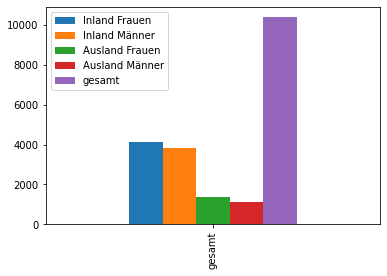

In [29]:
df.plot.bar()

<AxesSubplot:>

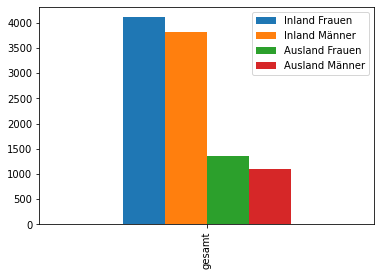

In [30]:
df.drop(columns=["gesamt"]).plot.bar()

In [31]:
# df = df.drop(columns=["gesamt"])

In [33]:
df['Inland Frauen'] / df['Inland Männer']

gesamt    1.078761
dtype: float64

In [34]:
df['Ausland Frauen'] / df['Ausland Männer']

gesamt    1.22525
dtype: float64